In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import urllib
%matplotlib inline 
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sb
%load_ext autoreload
import math

In [2]:
%autoreload

In [3]:
dwayne_file = "DwayneJohnsonActors.graphml"

In [4]:
dwayne = nx.read_graphml(dwayne_file)
dwayneDict = dwayne.nodes(data=True)

In [5]:
dwayne_deg = dict(nx.degree(dwayne, weight="weight"))
dwayne_bet = dict(nx.betweenness_centrality(dwayne, weight="weight"))
dwayne_clo = dict(nx.closeness_centrality(dwayne))

In [6]:
names = {actor:data['label'] for actor, data in dwayneDict}
gender ={actor:data['gender'] for actor, data in dwayneDict}

In [7]:
dwayne_df = pd.DataFrame({"Wt Degree": dwayne_deg, "bet":dwayne_bet, "clo":dwayne_clo, "Names": names, "Sex": gender})
dwayne_df = dwayne_df.set_index("Names")
dwayne_df.head()

,Wt Degree,bet,clo,Sex
Names,,,,
<Dwayne_Johnson>,41,0.042909,0.264034,male
<Ashley_Judd>,21,0.020275,0.239298,female
<Julie_Andrews>,60,0.041406,0.237217,female
<Wallace_Shawn>,54,0.064670,0.252686,male
<Miranda_Richardson>,44,0.046704,0.276225,female


In [8]:
dw_bool = dwayne_df['Sex'] == 'male' 
dw_filter = dwayne_df['bet'] != 0

#dw_bool
#dw_filter
nonZeroBet = dwayne_df['bet'][dw_filter]
nonZeroClo = dwayne_df['clo'][dw_filter]
#nonZeroBet[~dw_bool]

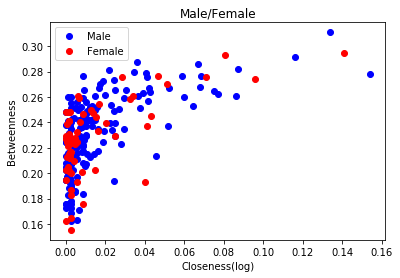

In [9]:
nonZeroBet = dwayne_df['bet'][dw_filter]

dwayne_betm = nonZeroBet[dw_bool]
dwayne_clom = nonZeroClo[dw_bool]
plt.plot( dwayne_betm, dwayne_clom, 'ob')

dwayne_betf = nonZeroBet[~dw_bool]
dwayne_clof = nonZeroClo[~dw_bool]
plt.plot( dwayne_betf, dwayne_clof,  'or')
#dwayne_clo = dwayne_df['clo']




#ga_age_mon = dwayne_df['age'][~dwayne_df['mon']]
#ga_clo_mon = dwayne_df['clo'][~dwayne_df['mon']]


#plt.plot( ga_age_mon, ga_clo_mon , 'or')

plt.title('Male/Female')
plt.ylabel('Betweenness')
plt.xlabel('Closeness(log)')
plt.legend(['Male', 'Female'])

In [10]:
type(dwayne_df['Sex'])
males = dwayne_df['Sex'][dw_bool]
len(males)
females = dwayne_df['Sex'][~dw_bool]
len(females)

226

Text(0.5,1,'Closeness in Males vs Females in DJO graph')

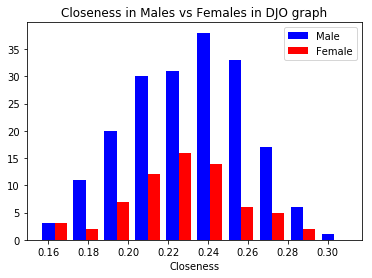

In [11]:

plt.hist([dwayne_clom, dwayne_clof]  , color = ['b', 'r'])
#plt.hist(dwayne_betm , bins , alpha = 0.5, color = 'b')
#plt.hist(dwayne_betf , bins,  alpha = 0.5, color = 'r')
plt.xlabel("Closeness")
plt.legend(["Male","Female"])
plt.title("Closeness in Males vs Females in DJO graph")

([array([  0.,   4.,  18.,  34.,  86., 108.,  14.,   3.,   0.]),
  array([ 0.,  1., 14., 15., 46., 69.,  9.,  5.,  0.])],
 array([0.1       , 0.12222222, 0.14444444, 0.16666667, 0.18888889,
        0.21111111, 0.23333333, 0.25555556, 0.27777778, 0.3       ]),
 <a list of 2 Lists of Patches objects>)

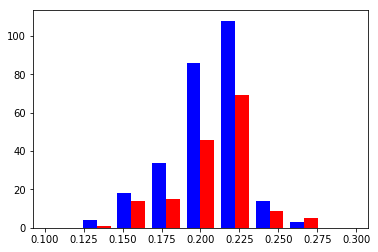

In [12]:
onlyZeroClo = dwayne_df['clo'][~dw_filter]

femaleClo = onlyZeroClo[dw_bool]
maleClo = onlyZeroClo[~dw_bool]
bins = np.linspace(0.1, 0.3, 10)
plt.hist([femaleClo, maleClo] , bins , color = ['b', 'r'])
#plt.hist(maleClo , bins,  alpha = 0.5, color = 'r')

([array([  9.,  20.,  41.,  79., 129.,  92.,  51.,  24.,  11.,   1.]),
  array([ 3., 18., 15., 37., 72., 51., 19.,  8.,  2.,  1.])],
 array([0.13451677, 0.15216404, 0.16981131, 0.18745859, 0.20510586,
        0.22275314, 0.24040041, 0.25804769, 0.27569496, 0.29334224,
        0.31098951]),
 <a list of 2 Lists of Patches objects>)

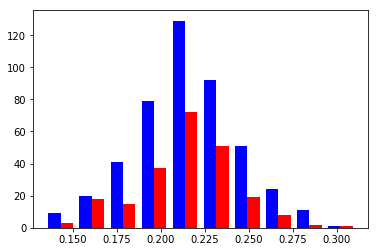

In [13]:

maleClo = dwayne_df['clo'][dw_bool]
femaleClo = dwayne_df['clo'][~dw_bool]
plt.hist([maleClo, femaleClo] , color = ['b', 'r'])

Text(0.5,1,'Male/Female Weighted Degree')

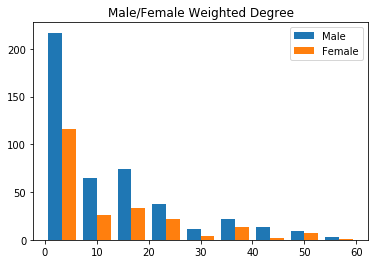

In [14]:

bins = np.linspace(0, 60,10)
plt.hist([dwayne_df['Wt Degree'][dw_bool], dwayne_df['Wt Degree'][~dw_bool]], bins)
plt.legend(["Male", "Female"])
plt.title("Male/Female Weighted Degree")
#plt.axes(y = 'log')

Text(0.5,1,'Betweenness in Males vs Females in DJO graph')

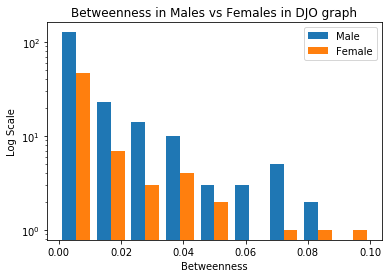

In [15]:
bins = np.linspace(0.0, 0.1, 10)
plt.hist([dwayne_betm, dwayne_betf] ,bins , )
plt.xlabel("Betweenness")
plt.ylabel("Log Scale")
plt.yscale("log")
plt.legend(["Male","Female"])
plt.title("Betweenness in Males vs Females in DJO graph")

Text(0.5,1,'Not Log')

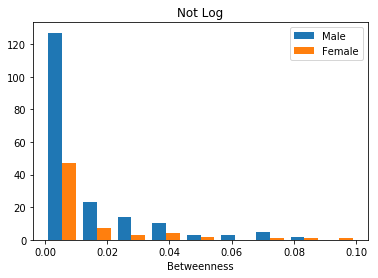

In [16]:
bins = np.linspace(0.0, 0.1, 10)
plt.hist([dwayne_betm, dwayne_betf] ,bins , )
plt.xlabel("Betweenness")
#plt.ylabel("Log Scale")
#plt.yscale("log")
plt.legend(["Male","Female"])
plt.title("Not Log")